In [13]:
import numpy as np
from scipy import integrate
import pandas as pd
from matplotlib import pyplot as plt
import pandas

In [18]:
plt.style.use('science')

SMALL_SIZE = 9
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize
# plt.rc('legend', titlesize=5)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [19]:
eos_data = pd.read_csv('eos_24_lowmass.dat', header = 0, delim_whitespace=True)
names = list(eos_data.columns.values)

Bdat = pd.read_csv('B_data.dat', sep="\t", header = None)

In [20]:
names

['r(km)',
 'M(Msun)',
 'nb(fm^-3)',
 'Ye',
 'Ymu',
 'Yp',
 'Yn',
 'mu_n(MeV)',
 'mu_p(MeV)',
 'mu_e(MeV)',
 'mu_mu(MeV)',
 'P(dyncm^-2)']

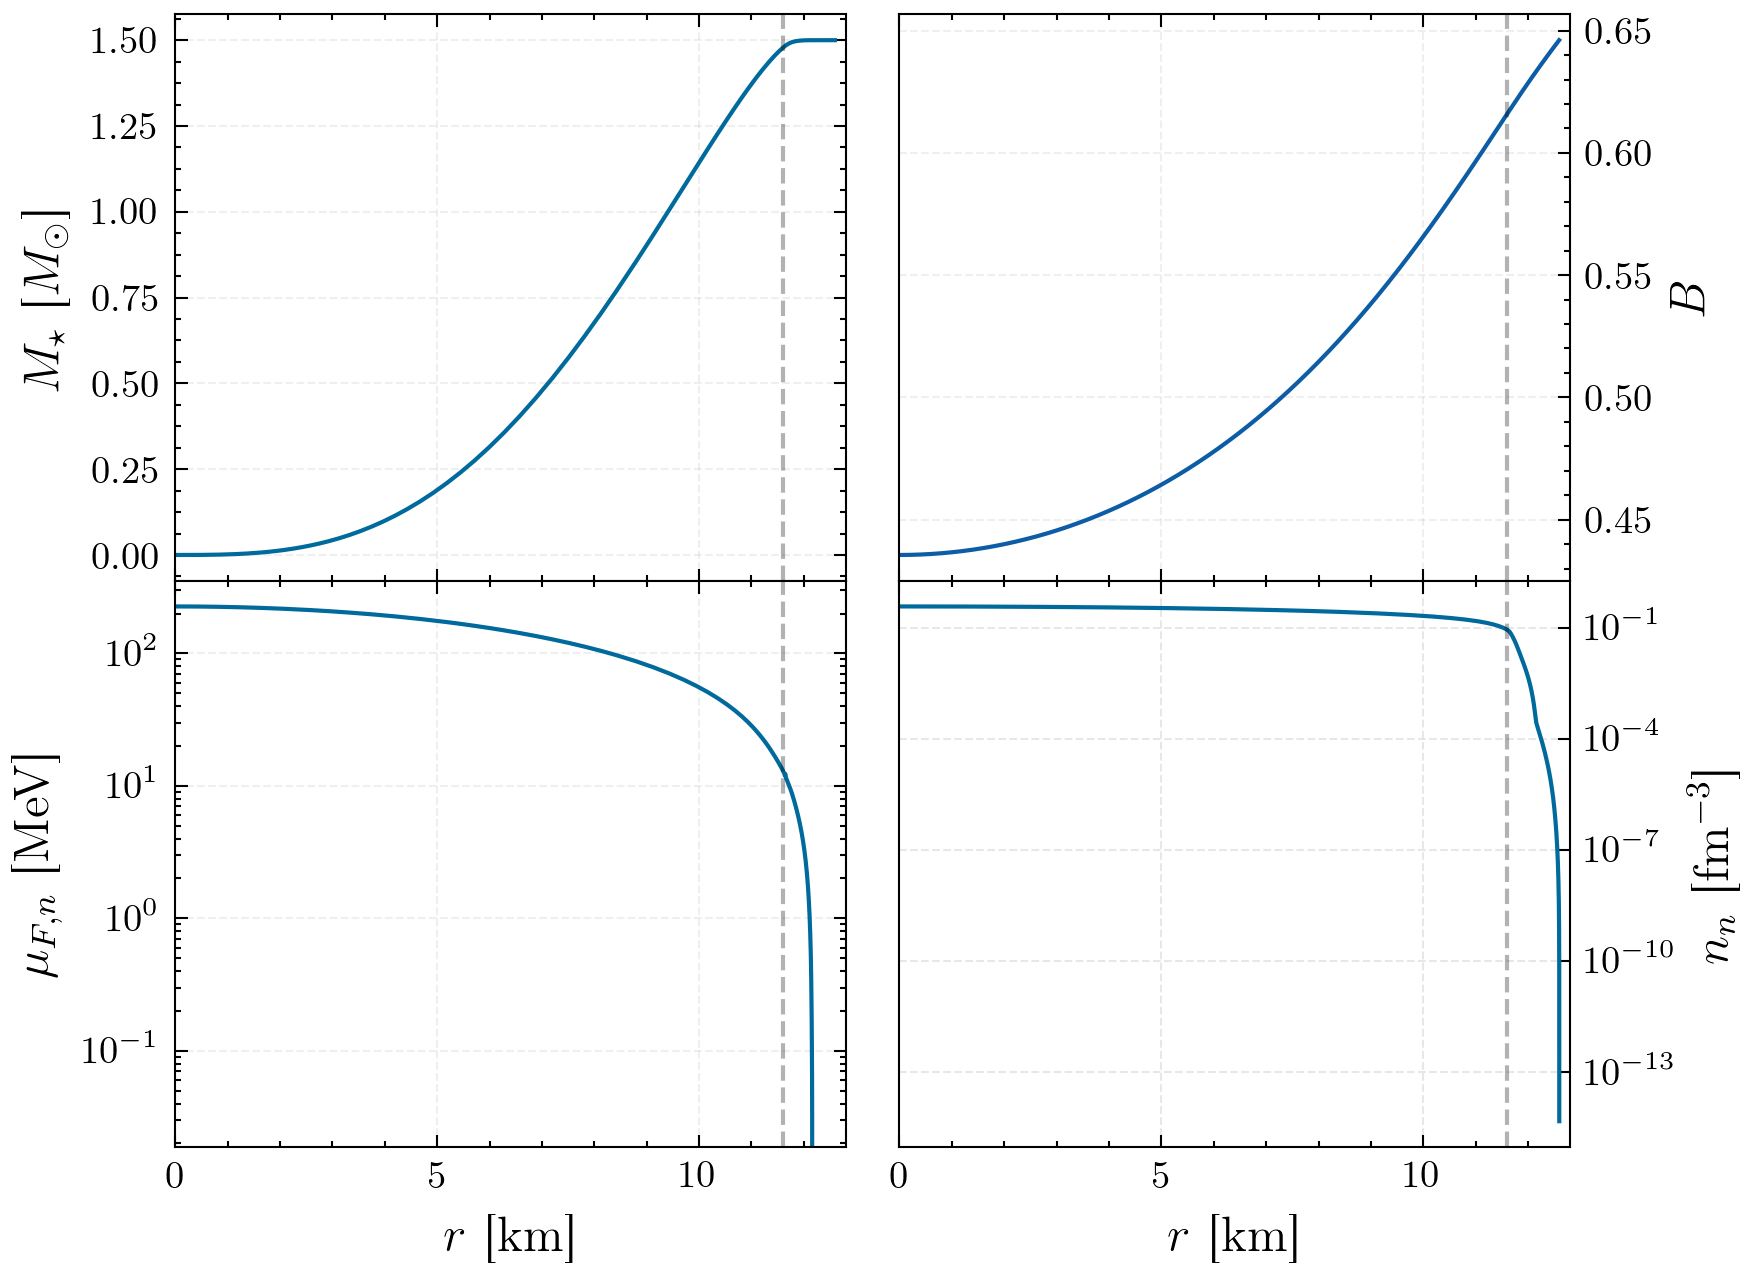

In [21]:
fig, ax = plt.subplots(2, 2, figsize = (6,5), dpi = 300 , sharex = True)
fig.subplots_adjust(hspace=0, wspace=0.08)

ax[0,0].plot(eos_data[[names[0]]], eos_data[[names[1]]], color = '#006a9c')
ax[0,0].set_ylabel('$M_\star$ [$M_\odot$]')
ax[0,0].grid(b=True, which='major',  linestyle='--', alpha=0.2)
ax[0,0].axvline(11.6, color = 'black', alpha = 0.3, linestyle = '--')

# # ax[0,1].plot(eos_data[[names[0]]], eos_data[[names[3]]], color = '#f0bc02')
# # ax[0,1].plot(eos_data[[names[0]]], eos_data[[names[4]]], color = '#43b859')
# # ax[0,1].plot(eos_data[[names[0]]], eos_data[[names[5]]], color = '#0097a1')
# ax[0,1].plot(eos_data[[names[0]]], eos_data[[names[6]]], color = '#006a9c')
# # ax[0,1].set_yscale('log')
# ax[0,1].set_ylabel('$Y_n$')
# ax[0,1].axvline(11.6, color = 'black', alpha = 0.3, linestyle = ':')
# ax[0,1].yaxis.set_label_position("right")
# ax[0,1].yaxis.tick_right()

ax[0,1].plot(Bdat[[0]], Bdat[[1]])
ax[0,1].set_ylabel('$B$')
ax[0,1].axvline(11.6, color = 'black', alpha = 0.3, linestyle = '--')
ax[0,1].grid(b=True, which='major',  linestyle='--', alpha=0.2)
ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()

ax[1,0].plot(eos_data[[names[0]]], eos_data[[names[7]]], color = '#006a9c')
ax[1,0].axvline(11.6, color = 'black', alpha = 0.3, linestyle = '--')
ax[1,0].grid(b=True, which='major',  linestyle='--', alpha=0.2)
ax[1,0].set_yscale('log')
ax[1,0].set_ylabel('$\mu_{F,n}$ [MeV]')
ax[1,0].set_xlabel('$r$ [km]')
ax[1,0].set_xlim(0, 12.7)

ax[1,1].plot(eos_data[[names[0]]], np.asarray(eos_data[names[2]].tolist()) * np.asarray(eos_data[names[6]].tolist()), color = '#006a9c')
ax[1,1].axvline(11.6, color = 'black', alpha = 0.3, linestyle = '--')
ax[1,1].grid(b=True, which='major',  linestyle='--', alpha=0.3)
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('$n_n$ [fm$^{-3}$]')
ax[1,1].yaxis.set_label_position("right")
ax[1,1].set_xlabel('$r$ [km]')
ax[1,1].set_xlim(0, 12.8)
ax[1,1].yaxis.tick_right()

plt.savefig('ns_eos.pdf')

In [22]:
dens_prof = pd.read_csv('NSdens.dat', sep="\t", header = None)

In [23]:
def dens_plot():
    
    fig, ax = plt.subplots(figsize = (5, 3), dpi = 300)
    
    ax.plot(dens_prof[0], dens_prof[1]/1e14, color = '#006a9c')
    ax.set_xlim(dens_prof[0][0], dens_prof[0][len(dens_prof[0])-1])
    ax.set_xlabel('$r$ [km]')
    ax.set_ylabel('$\\rho(r)$ [$10^{14}$ g cm$^{-3}$]')
#     ax.set_ylim(6, 8)
    ax.grid(b=None, which='major', axis='both', linestyle = '--', alpha = 0.2)
    plt.savefig('dens_prof.pdf')
    plt.show()

In [24]:
def lepton_plots():
    fig, ax = plt.subplots(2, 2, figsize = (6,4), dpi = 300 , sharex = 'col', sharey = 'row')
    fig.subplots_adjust(hspace=0, wspace= 0)

    ax[0,0].plot(eos_data[[names[0]]], eos_data[[names[3]]], color = '#006a9c')
    ax[0,0].set_ylabel('$Y_e$')
    ax[0,0].set_yscale('log')
    ax[0,0].set_ylim(10**-3, 10**-1)
    ax[0,0].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax[0,0].axvline(11.6, color = 'black', alpha = 0.3, linestyle = '--')

    ax[0,1].plot(eos_data[[names[0]]], eos_data[[names[4]]], color = '#006a9c')
    ax[0,1].set_ylabel('$Y_\\mu$')
    ax[0,1].set_yscale('log')
#     ax[0,0].set_ylim(10**-3, 10**-1)
    ax[0,1].axvline(11.6, color = 'black', alpha = 0.3, linestyle = '--')
    ax[0,1].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax[0,1].yaxis.set_label_position("right")
    ax[0,1].yaxis.tick_right()

    ax[1,0].plot(eos_data[[names[0]]], eos_data[[names[9]]], color = '#006a9c')
    ax[1,0].axvline(11.6, color = 'black', alpha = 0.3, linestyle = '--')
    ax[1,0].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax[1,0].set_yscale('log')

    ax[1,0].set_ylabel('$\mu_{F,e}$ [MeV]')
    ax[1,0].set_xlabel('$r$ [km]')
    ax[1,0].set_xlim(0, 12.7)

    ax[1,1].plot(eos_data[[names[0]]], np.asarray(eos_data[names[10]].tolist()) * np.asarray(eos_data[names[6]].tolist()), color = '#006a9c')
    ax[1,1].axvline(11.6, color = 'black', alpha = 0.3, linestyle = '--')
    ax[1,1].grid(b=True, which='major',  linestyle='--', alpha=0.3)
    ax[1,1].set_yscale('log')
#     ax[1,0].set_ylim(10**0, 10**3)
    ax[1,1].set_ylabel('$\\mu_{F,\\mu}$ [MeV]')
    ax[1,1].yaxis.set_label_position("right")
    ax[1,1].set_xlabel('$r$ [km]')
    ax[1,1].set_xlim(0.01, 12.7)
    ax[1,1].yaxis.tick_right()

    plt.savefig('lep_eos.pdf')

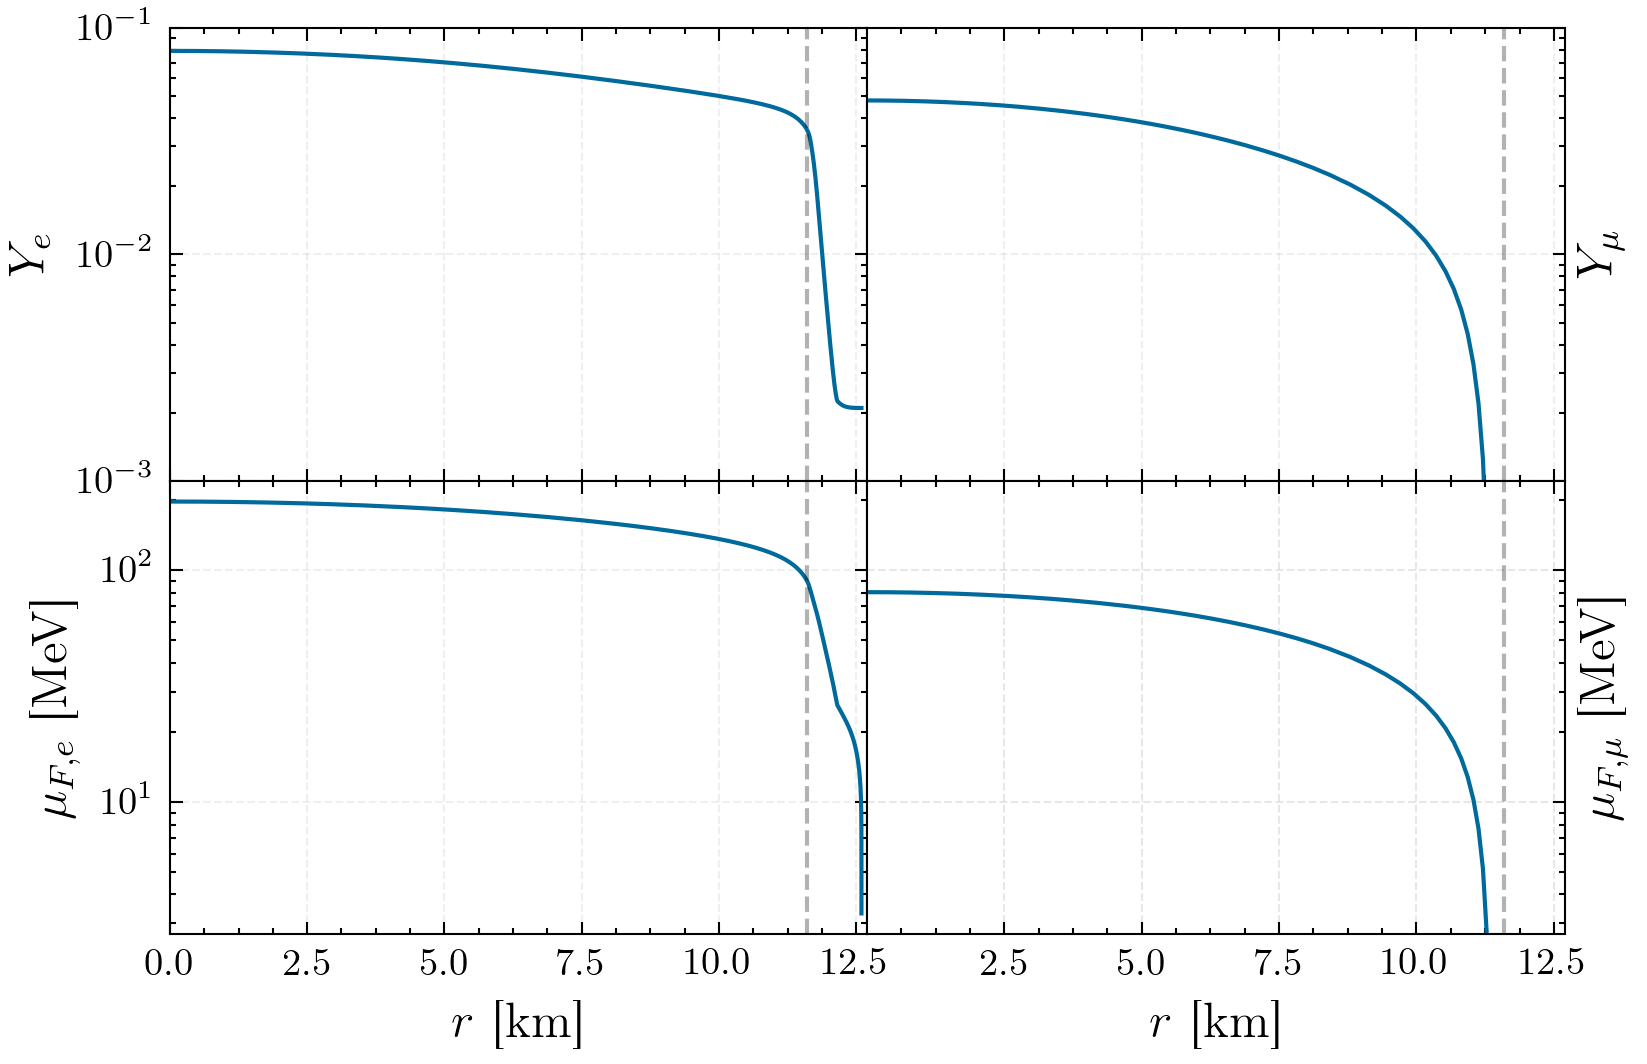

In [25]:
lepton_plots()